In [1]:
import numpy as np
import pandas as pd
import functions as funs
import model as mod
import sampler as samp
import matplotlib.pyplot as plt
import numpy.random as rand

In [2]:
myData_tot = funs.dataObject('tot')
myData_sys = funs.dataObject('sys')

In [3]:
num_chains = 50
len_chains = 10000
sigmas = [0.7,0.02,0.05,0.25]

chains_tot_uniform = []
chains_sys_uniform = []
chains_tot_gaussian = []
chains_sys_gaussian = []

for i in range(0,num_chains):
    chains_tot_uniform.append(samp.mcmc_sampler(myData_tot,len_chains,sigmas=sigmas,prior='uniform'))
    chains_sys_uniform.append(samp.mcmc_sampler(myData_sys,len_chains,sigmas=sigmas,prior='uniform'))
    chains_tot_gaussian.append(samp.mcmc_sampler(myData_tot,len_chains,sigmas=sigmas,prior='gaussian'))
    chains_sys_gaussian.append(samp.mcmc_sampler(myData_sys,len_chains,sigmas=sigmas,prior='gaussian'))

/home/david/anaconda3/lib/python3.9/site-packages/astropy/cosmology/core.py:1292: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  f = lambda z1, z2: quad(self._inv_efunc_scalar, z1, z2,
/home/david/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2197: RuntimeWarning: invalid value encountered in <lambda> (vectorized)
  outputs = ufunc(*inputs)


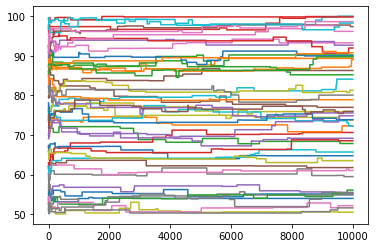

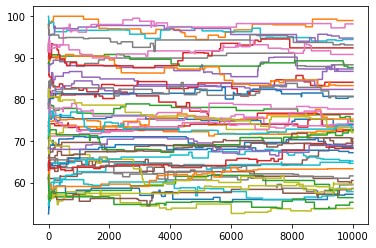

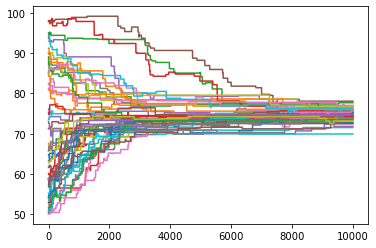

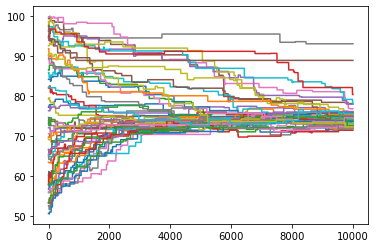

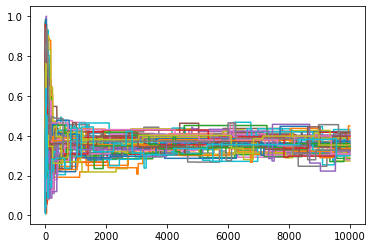

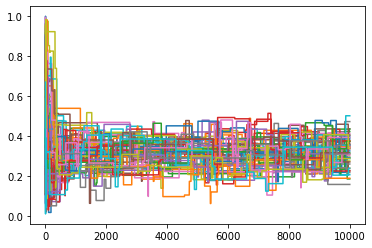

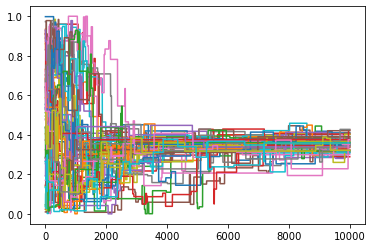

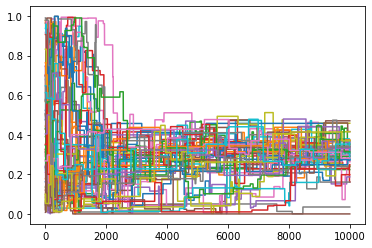

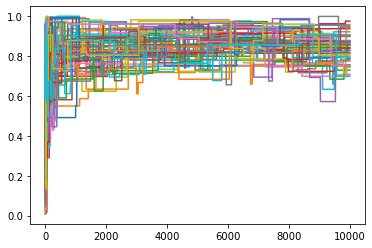

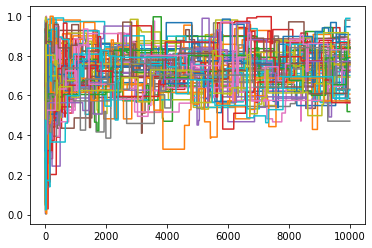

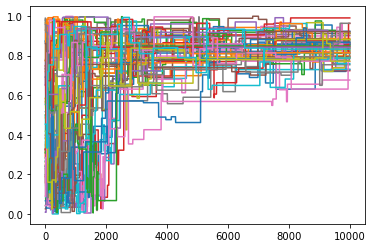

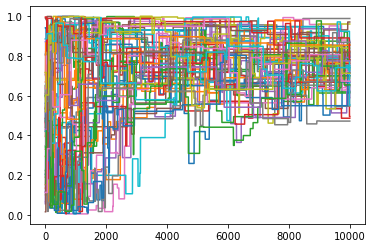

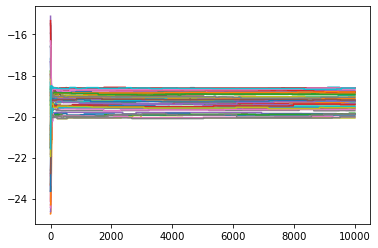

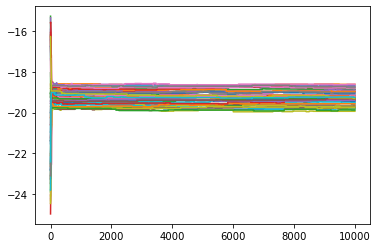

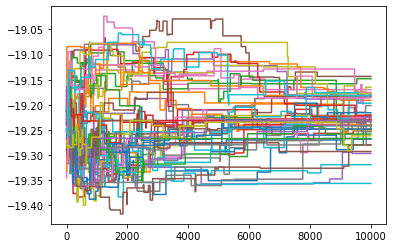

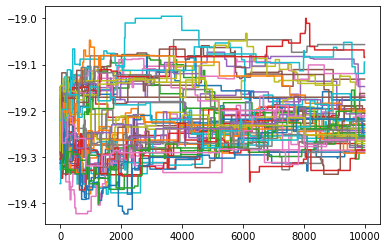

In [4]:
for i in range(0,4):
    for chain in chains_tot_uniform:
        plt.plot(chain[:,i])

    plt.show()

    for chain in chains_sys_uniform:
        plt.plot(chain[:,i])

    plt.show()

    for chain in chains_tot_gaussian:
        plt.plot(chain[:,i])

    plt.show()

    for chain in chains_sys_gaussian:
        plt.plot(chain[:,i])

    plt.show()

In [5]:
names = ['H0', 'Om', 'Ode','M']
labels = ['H_0 [km/s/Mpc]', '\Omega_m', '\Omega_{\lambda}', 'M']

Removed 0.2 as burn in
Removed 0.2 as burn in
Removed 0.2 as burn in
Removed 0.2 as burn in


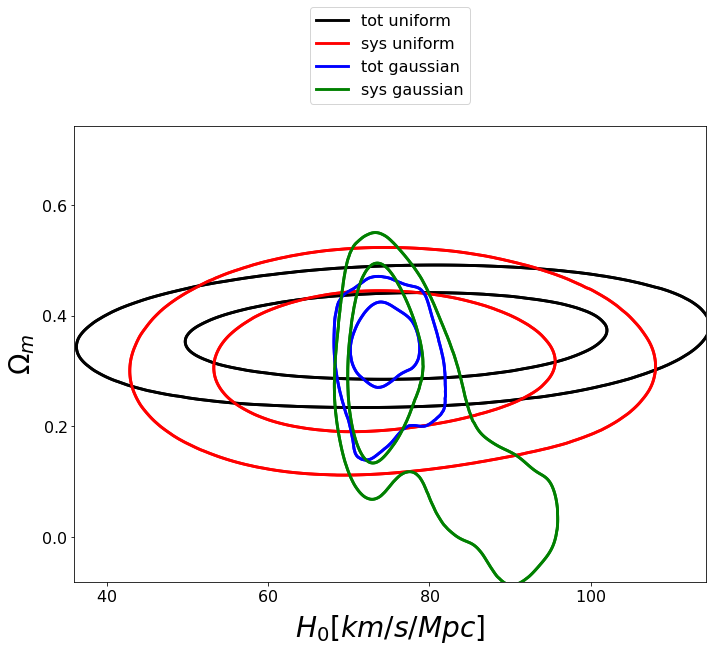

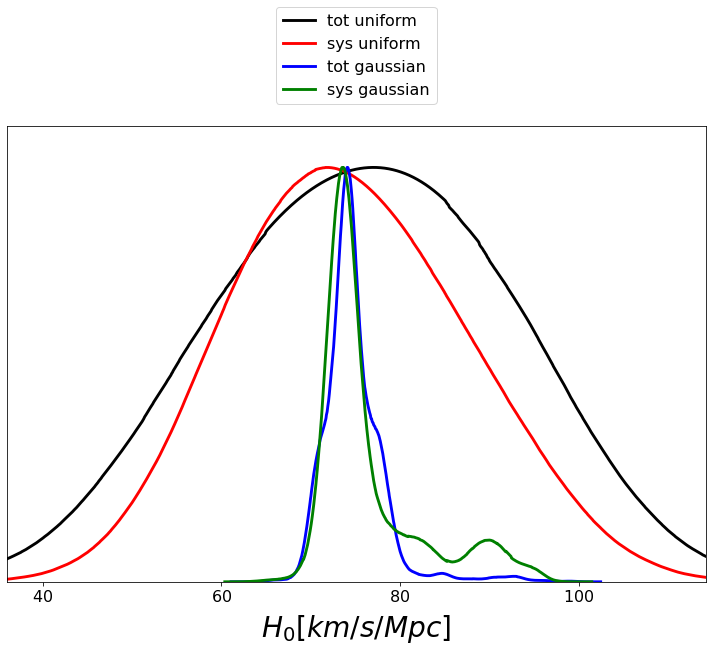

In [6]:
ch1 = funs.make_plot([chains_tot_uniform, chains_sys_uniform, chains_tot_gaussian, chains_sys_gaussian], legend=['tot uniform', 'sys uniform','tot gaussian', 'sys gaussian'], label=labels, name=names)
ch1.plot_2d()
ch1.plot_1d()

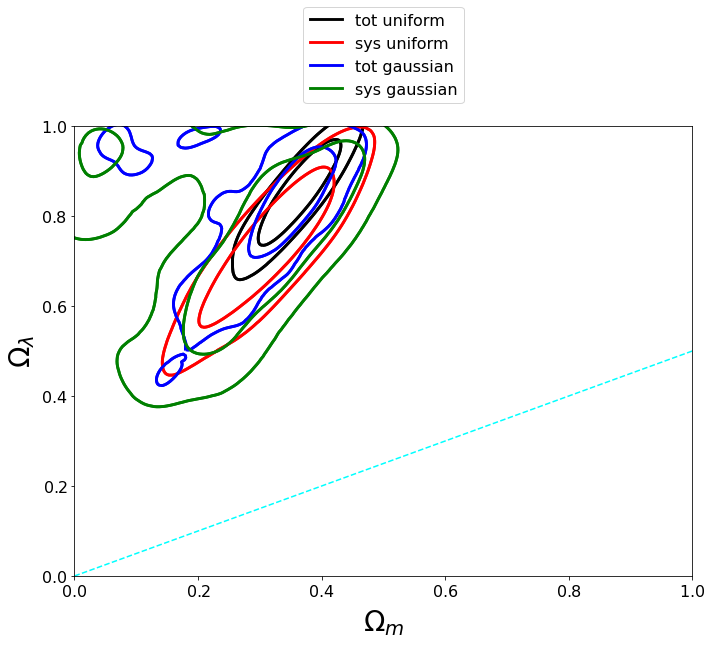

In [7]:
ch1.plot_2d([1,2],accel_decel_line=True)

Removed 0.2 as burn in
Removed 0.2 as burn in


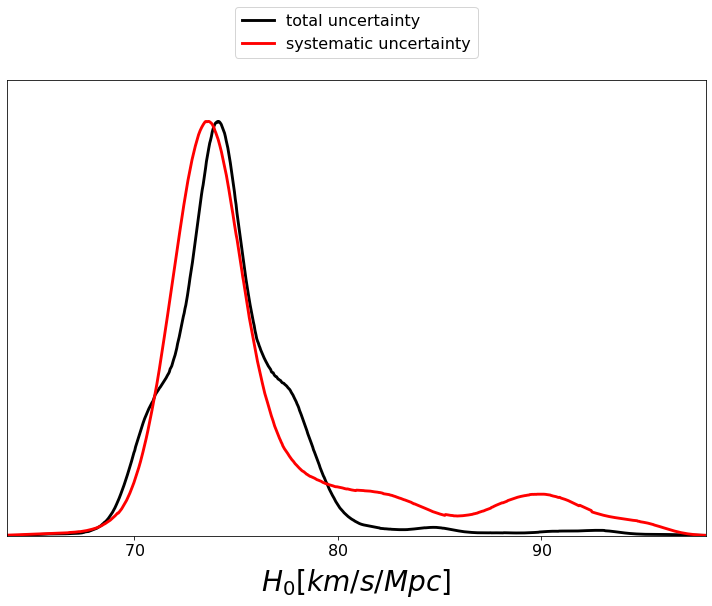

In [10]:
H0_estimate = funs.make_plot([chains_tot_gaussian, chains_sys_gaussian], legend=['total uncertainty', 'systematic uncertainty'], label=labels, name=names)
H0_estimate.plot_1d()
plt.savefig('H0_estimate.png')

Removed 0.2 as burn in
Removed 0.2 as burn in


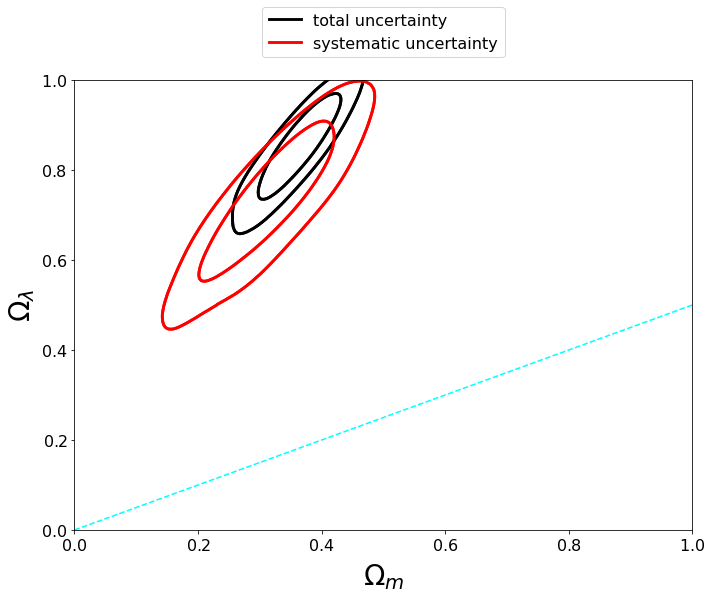

In [11]:
Omega_estimate = funs.make_plot([chains_tot_uniform, chains_sys_uniform], legend=['total uncertainty', 'systematic uncertainty'], label=labels, name=names)
Omega_estimate.plot_2d([1,2],accel_decel_line=True)
plt.savefig('Omega_estimates.png')